# Get the data

In [ ]:
!wget https://www.dropbox.com/s/5t0jnvpzoin62tv/mengary-revenue-prediction.zip?dl=0

--2021-03-16 18:46:24--  https://www.dropbox.com/s/5t0jnvpzoin62tv/mengary-revenue-prediction.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.18, 2620:100:6027:18::a27d:4812
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/5t0jnvpzoin62tv/mengary-revenue-prediction.zip [following]
--2021-03-16 18:46:24--  https://www.dropbox.com/s/raw/5t0jnvpzoin62tv/mengary-revenue-prediction.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc3565ad4284f9695761cc375701.dl.dropboxusercontent.com/cd/0/inline/BKz9KxJRjHKv4wE9Sb3184y3wqxGkpInJBVnOBkhkF9ykMidiEBG-5Z7AiQJqtYyJ_ceA6Lm_LJbC5555bog6sGaNL_2UD2zbjgRXOX4e0X8Jt3GlEFzvrqtsCdtu-4Q3iS-VWgec5IoRReewbZw02MY/file# [following]
--2021-03-16 18:46:25--  https://uc3565ad4284f9695761cc375701.dl.dropboxusercontent.com/cd/0/inline/BKz9KxJRjHKv4wE9Sb3184y3wqxG

In [ ]:
!unzip mengary-revenue-prediction.zip?dl=0

Archive:  mengary-revenue-prediction.zip?dl=0
  inflating: sampleSolution.csv      
  inflating: test.csv                
  inflating: train.csv               


#Load the data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
train = pd.read_csv("/content/train.csv")
test = pd.read_csv("/content/test.csv")

In [ ]:
train.head()

,id,departure city,discount,price,no of items,location,class,segment,sub-class,delivery type,RID,profit,delivery date,address code,departure state,placement date
0,1,Houston,0.2,16.448,2,Central,kariox,Consumer,phone,Standard Class,7981,5.5512,2018-01-01,77095,Texas,2018-01-01
1,2,Westland,0.0,29.700,5,Central,kariox,Consumer,headset,Standard Class,6334,13.3650,2018-01-01,48185,Michigan,2018-01-01
2,3,Westland,0.0,14.730,3,Central,qexty,Consumer,shorts,Standard Class,6333,4.8609,2018-01-01,48185,Michigan,2018-01-01
3,4,Westland,0.0,43.920,3,Central,kariox,Consumer,television,Standard Class,6332,12.7368,2018-01-01,48185,Michigan,2018-01-01
4,5,Westland,0.0,66.580,2,Central,kariox,Consumer,laptop,Standard Class,6331,15.9792,2018-01-01,48185,Michigan,2018-01-01


# EDA

* Find CP using SP - profit 
* Total Sale : SP*no of items
* no of days to deliver
* Year: then plot year vs profit, year vs sales

In [ ]:
# Drop the null value
train.dropna(axis = 0, inplace=True)

In [ ]:
# Combine the training and testing set for data analysis
train_len = train.shape[0]

# Split the training set into features and the targets
X = train.drop(['profit'], axis=1)
y = train['profit']

# Form a complete dataset
complete_data = pd.concat([X, test], axis = 0)

# Print first 5 rows
complete_data.head()

,id,departure city,discount,price,no of items,location,class,segment,sub-class,delivery type,RID,delivery date,address code,departure state,placement date
0,1,Houston,0.2,16.448,2,Central,kariox,Consumer,phone,Standard Class,7981,2018-01-01,77095,Texas,2018-01-01
1,2,Westland,0.0,29.700,5,Central,kariox,Consumer,headset,Standard Class,6334,2018-01-01,48185,Michigan,2018-01-01
2,3,Westland,0.0,14.730,3,Central,qexty,Consumer,shorts,Standard Class,6333,2018-01-01,48185,Michigan,2018-01-01
3,4,Westland,0.0,43.920,3,Central,kariox,Consumer,television,Standard Class,6332,2018-01-01,48185,Michigan,2018-01-01
4,5,Westland,0.0,66.580,2,Central,kariox,Consumer,laptop,Standard Class,6331,2018-01-01,48185,Michigan,2018-01-01


In [ ]:
print("The shape of complete data",complete_data.shape)

The shape of complete data (9993, 15)


In [ ]:
# Check for Null Values
complete_data.isnull().sum()

id                 0
departure city     0
discount           0
price              0
no of items        0
location           0
class              0
segment            0
sub-class          0
delivery type      0
RID                0
delivery date      0
address code       0
departure state    0
placement date     0
dtype: int64

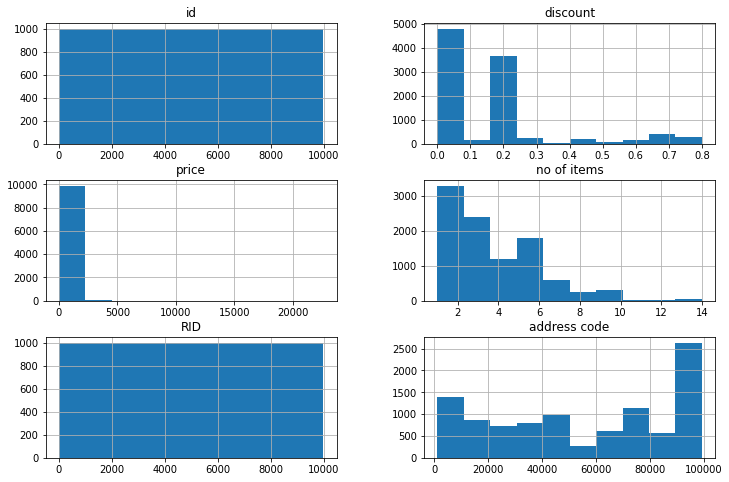

In [ ]:
complete_data.hist(figsize = (12,8))
plt.show()

In [ ]:
# Drop the id and RID
complete_data.drop(['id', 'RID'], axis = 1, inplace = True)

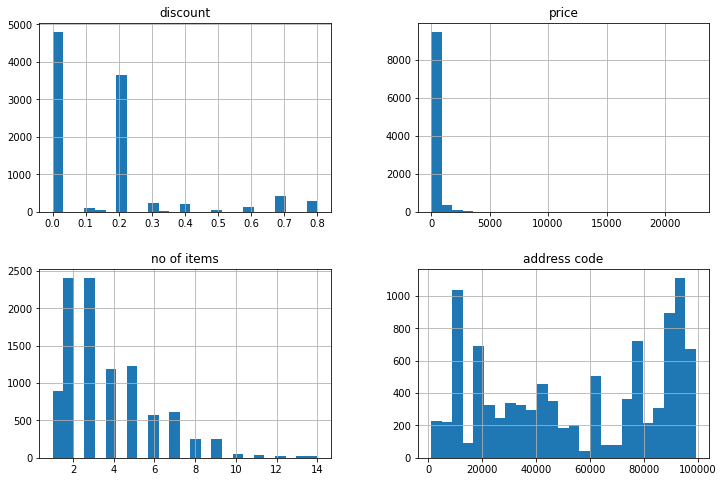

In [ ]:
complete_data.hist(figsize = (12,8), bins = 25)
plt.show()

In [ ]:
# Creating discounted price column
complete_data['discounted price'] = complete_data['price'] - complete_data['discount']*complete_data['price']

In [ ]:
complete_data.head()

,departure city,discount,price,no of items,location,class,segment,sub-class,delivery type,delivery date,address code,departure state,placement date,discounted price
0,Houston,0.2,16.448,2,Central,kariox,Consumer,phone,Standard Class,2018-01-01,77095,Texas,2018-01-01,13.1584
1,Westland,0.0,29.700,5,Central,kariox,Consumer,headset,Standard Class,2018-01-01,48185,Michigan,2018-01-01,29.7000
2,Westland,0.0,14.730,3,Central,qexty,Consumer,shorts,Standard Class,2018-01-01,48185,Michigan,2018-01-01,14.7300
3,Westland,0.0,43.920,3,Central,kariox,Consumer,television,Standard Class,2018-01-01,48185,Michigan,2018-01-01,43.9200
4,Westland,0.0,66.580,2,Central,kariox,Consumer,laptop,Standard Class,2018-01-01,48185,Michigan,2018-01-01,66.5800


In [ ]:
# Create a sales feature
complete_data['sales'] = complete_data['discounted price']*complete_data['no of items']

In [ ]:
complete_data.tail()

,departure city,discount,price,no of items,location,class,segment,sub-class,delivery type,delivery date,address code,departure state,placement date,discounted price,sales
3289,New York City,0.0,31.920,4,East,kariox,Consumer,laptop,Second Class,2021-12-01,10035,New York,2021-12-01,31.9200,127.6800
3290,New York City,0.0,19.440,3,East,kariox,Consumer,phone,Second Class,2021-12-01,10035,New York,2021-12-01,19.4400,58.3200
3291,New York City,0.0,272.940,3,East,kariox,Consumer,laptop,Second Class,2021-12-01,10035,New York,2021-12-01,272.9400,818.8200
3292,San Francisco,0.2,113.568,2,West,qexty,Consumer,tshirts,Standard Class,2021-12-01,94110,California,2021-12-01,90.8544,181.7088
3293,Loveland,0.2,3.024,3,West,kariox,Consumer,lighting,Standard Class,2022-01-01,80538,Colorado,2021-12-01,2.4192,7.2576


In [ ]:
# Convert dates into datetime variables
complete_data['delivery date'] = pd.to_datetime(complete_data['delivery date'])
complete_data['placement date'] = pd.to_datetime(complete_data['placement date'])

In [ ]:
# Create number of days to deliver
complete_data['no of days to deliver'] = complete_data['delivery date'] - complete_data['placement date']
complete_data['no of days to deliver'] = complete_data['no of days to deliver'].dt.days

In [ ]:
complete_data.head()

,departure city,discount,price,no of items,location,class,segment,sub-class,delivery type,delivery date,address code,departure state,placement date,discounted price,sales,no of days to deliver
0,Houston,0.2,16.448,2,Central,kariox,Consumer,phone,Standard Class,2018-01-01,77095,Texas,2018-01-01,13.1584,26.3168,0
1,Westland,0.0,29.700,5,Central,kariox,Consumer,headset,Standard Class,2018-01-01,48185,Michigan,2018-01-01,29.7000,148.5000,0
2,Westland,0.0,14.730,3,Central,qexty,Consumer,shorts,Standard Class,2018-01-01,48185,Michigan,2018-01-01,14.7300,44.1900,0
3,Westland,0.0,43.920,3,Central,kariox,Consumer,television,Standard Class,2018-01-01,48185,Michigan,2018-01-01,43.9200,131.7600,0
4,Westland,0.0,66.580,2,Central,kariox,Consumer,laptop,Standard Class,2018-01-01,48185,Michigan,2018-01-01,66.5800,133.1600,0


In [ ]:
# Extract Delivery Year and Placement Year
complete_data['delivery year'] = complete_data['delivery date'].dt.year
complete_data['placement year'] = complete_data['placement date'].dt.year

In [ ]:
complete_data['no of days to deliver'].value_counts() # Consider it as a categorical variable

0     8773
31     716
30     478
28      22
29       4
Name: no of days to deliver, dtype: int64

In [ ]:
complete_data.head()

,departure city,discount,price,no of items,location,class,segment,sub-class,delivery type,delivery date,address code,departure state,placement date,discounted price,sales,no of days to deliver,delivery year,placement year
0,Houston,0.2,16.448,2,Central,kariox,Consumer,phone,Standard Class,2018-01-01,77095,Texas,2018-01-01,13.1584,26.3168,0,2018,2018
1,Westland,0.0,29.700,5,Central,kariox,Consumer,headset,Standard Class,2018-01-01,48185,Michigan,2018-01-01,29.7000,148.5000,0,2018,2018
2,Westland,0.0,14.730,3,Central,qexty,Consumer,shorts,Standard Class,2018-01-01,48185,Michigan,2018-01-01,14.7300,44.1900,0,2018,2018
3,Westland,0.0,43.920,3,Central,kariox,Consumer,television,Standard Class,2018-01-01,48185,Michigan,2018-01-01,43.9200,131.7600,0,2018,2018
4,Westland,0.0,66.580,2,Central,kariox,Consumer,laptop,Standard Class,2018-01-01,48185,Michigan,2018-01-01,66.5800,133.1600,0,2018,2018


In [ ]:
complete_data['delivery year'].value_counts()

2021    3316
2020    2565
2019    2131
2018    1939
2022      42
Name: delivery year, dtype: int64

In [ ]:
complete_data['placement year'].value_counts()

2021    3319
2020    2580
2019    2102
2018    1992
Name: placement year, dtype: int64

In [ ]:
complete_data['discount'].value_counts() # Since we 12 discounted values we can consider it as a categorical feature

0.00    4797
0.20    3657
0.70     418
0.80     300
0.30     227
0.40     206
0.60     138
0.10      94
0.50      66
0.15      52
0.32      27
0.45      11
Name: discount, dtype: int64

In [ ]:
complete_data.drop(['delivery date', 'placement date'], axis = 1, inplace = True)

In [ ]:
complete_data.head()

,departure city,discount,price,no of items,location,class,segment,sub-class,delivery type,address code,departure state,discounted price,sales,no of days to deliver,delivery year,placement year
0,Houston,0.2,16.448,2,Central,kariox,Consumer,phone,Standard Class,77095,Texas,13.1584,26.3168,0,2018,2018
1,Westland,0.0,29.700,5,Central,kariox,Consumer,headset,Standard Class,48185,Michigan,29.7000,148.5000,0,2018,2018
2,Westland,0.0,14.730,3,Central,qexty,Consumer,shorts,Standard Class,48185,Michigan,14.7300,44.1900,0,2018,2018
3,Westland,0.0,43.920,3,Central,kariox,Consumer,television,Standard Class,48185,Michigan,43.9200,131.7600,0,2018,2018
4,Westland,0.0,66.580,2,Central,kariox,Consumer,laptop,Standard Class,48185,Michigan,66.5800,133.1600,0,2018,2018


In [ ]:
# Split into numerical and categorical data
numerical_features = ['price', 'discounted price', 'sales']
categorical_features = [feature for feature in complete_data.columns if feature not in numerical_features]

In [ ]:
print("Total numerical features : ",len(numerical_features))
print("Total categorcial features : ", len(categorical_features))

Total numerical features :  3
Total categorcial features :  13


In [ ]:
complete_data = pd.concat((complete_data[numerical_features], complete_data[categorical_features]), axis = 1)

In [ ]:
complete_data.head()

,price,discounted price,sales,departure city,discount,no of items,location,class,segment,sub-class,delivery type,address code,departure state,no of days to deliver,delivery year,placement year
0,16.448,13.1584,26.3168,Houston,0.2,2,Central,kariox,Consumer,phone,Standard Class,77095,Texas,0,2018,2018
1,29.700,29.7000,148.5000,Westland,0.0,5,Central,kariox,Consumer,headset,Standard Class,48185,Michigan,0,2018,2018
2,14.730,14.7300,44.1900,Westland,0.0,3,Central,qexty,Consumer,shorts,Standard Class,48185,Michigan,0,2018,2018
3,43.920,43.9200,131.7600,Westland,0.0,3,Central,kariox,Consumer,television,Standard Class,48185,Michigan,0,2018,2018
4,66.580,66.5800,133.1600,Westland,0.0,2,Central,kariox,Consumer,laptop,Standard Class,48185,Michigan,0,2018,2018


In [ ]:
# Split back into training and testing set
training_data = complete_data[ : train_len]
testing_data = complete_data[train_len : ]

In [ ]:
# concat the target variable and training set
training_set = pd.concat((training_data, y), axis = 1)

In [ ]:
training_set.head()

,price,discounted price,sales,departure city,discount,no of items,location,class,segment,sub-class,delivery type,address code,departure state,no of days to deliver,delivery year,placement year,profit
0,16.448,13.1584,26.3168,Houston,0.2,2,Central,kariox,Consumer,phone,Standard Class,77095,Texas,0,2018,2018,5.5512
1,29.700,29.7000,148.5000,Westland,0.0,5,Central,kariox,Consumer,headset,Standard Class,48185,Michigan,0,2018,2018,13.3650
2,14.730,14.7300,44.1900,Westland,0.0,3,Central,qexty,Consumer,shorts,Standard Class,48185,Michigan,0,2018,2018,4.8609
3,43.920,43.9200,131.7600,Westland,0.0,3,Central,kariox,Consumer,television,Standard Class,48185,Michigan,0,2018,2018,12.7368
4,66.580,66.5800,133.1600,Westland,0.0,2,Central,kariox,Consumer,laptop,Standard Class,48185,Michigan,0,2018,2018,15.9792


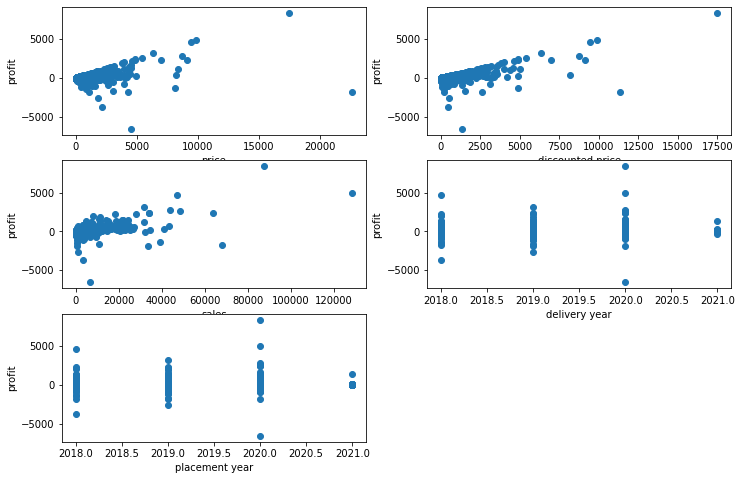

In [ ]:
# plot scatter plots
scatter_cols = ['price', 'discounted price', 'sales', 'delivery year', 'placement year']
target_col = 'profit'

# Create a figure for scatter plots
plt.figure(figsize=(12,8))
for cnt, col in enumerate(scatter_cols):
  plt.subplot(3,2,cnt+1)
  plt.scatter(training_set[col], training_set[target_col])
  plt.xlabel(col)
  plt.ylabel(target_col)

In [ ]:
# Drop the address code column
training_set.drop(['address code'], axis=1, inplace=True)
testing_data.drop(['address code'], axis=1, inplace=True)
complete_data.drop(['address code'], axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
training_set.head()

,price,discounted price,sales,departure city,discount,no of items,location,class,segment,sub-class,delivery type,departure state,no of days to deliver,delivery year,placement year,profit
0,16.448,13.1584,26.3168,Houston,0.2,2,Central,kariox,Consumer,phone,Standard Class,Texas,0,2018,2018,5.5512
1,29.700,29.7000,148.5000,Westland,0.0,5,Central,kariox,Consumer,headset,Standard Class,Michigan,0,2018,2018,13.3650
2,14.730,14.7300,44.1900,Westland,0.0,3,Central,qexty,Consumer,shorts,Standard Class,Michigan,0,2018,2018,4.8609
3,43.920,43.9200,131.7600,Westland,0.0,3,Central,kariox,Consumer,television,Standard Class,Michigan,0,2018,2018,12.7368
4,66.580,66.5800,133.1600,Westland,0.0,2,Central,kariox,Consumer,laptop,Standard Class,Michigan,0,2018,2018,15.9792


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

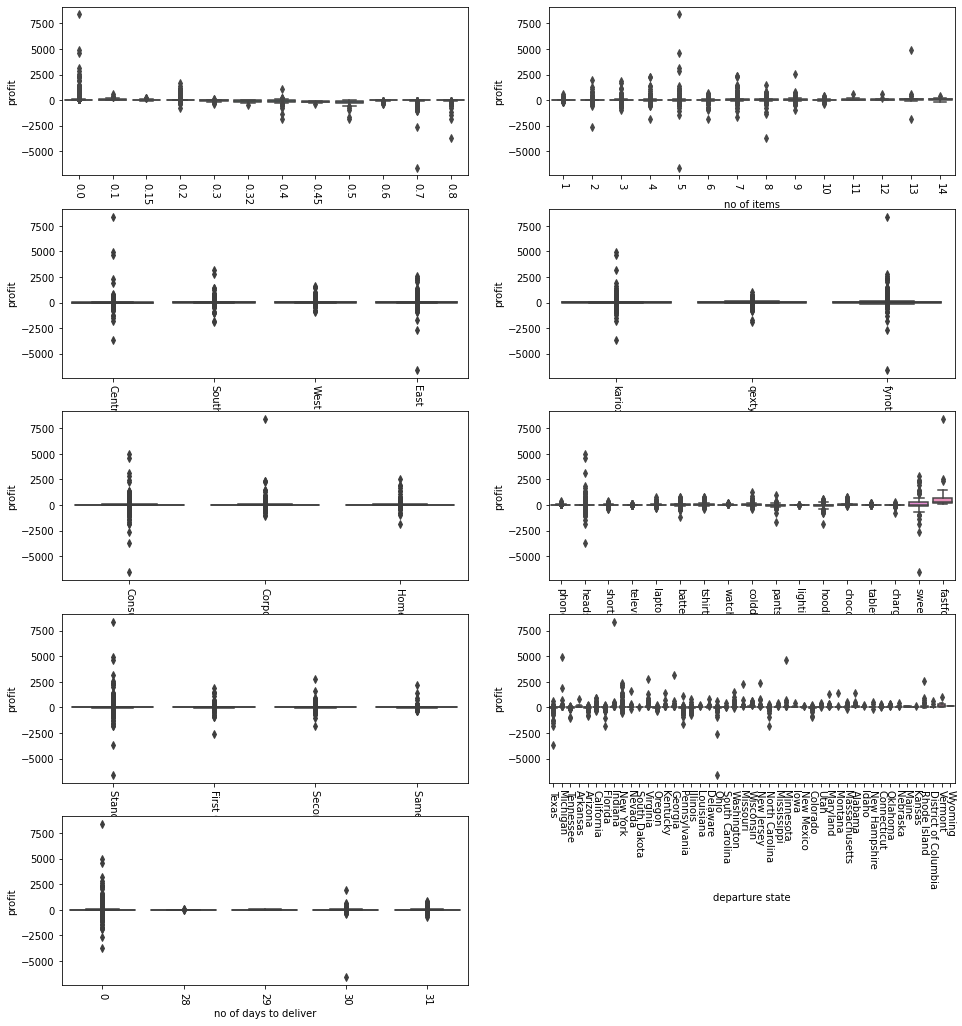

In [ ]:
# Boxplots
boxplot_cols = ['discount', 'no of items', 'location', 'class', 'segment', 'sub-class', 'delivery type', 'departure state', 'no of days to deliver']
target_col = 'profit'

# Plot boxplots
plt.figure(figsize = (16, 18))
for cnt, col in enumerate(boxplot_cols):
  plt.subplot(5,2,cnt+1)
  sns.boxplot(training_set[col], training_set[target_col])
  plt.xticks(rotation = -90)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


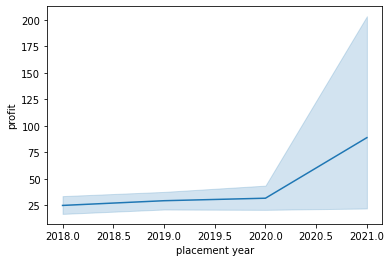

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


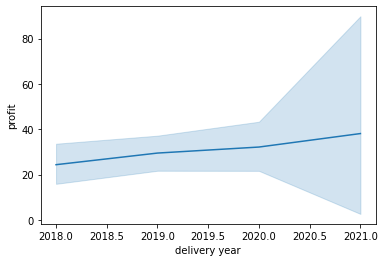

In [ ]:
sns.lineplot(training_set['placement year'], y = training_set['profit'])
plt.show()

sns.lineplot(training_set['delivery year'], y = training_set['profit'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


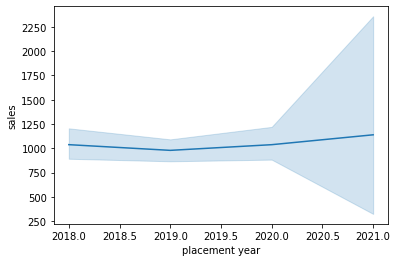

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


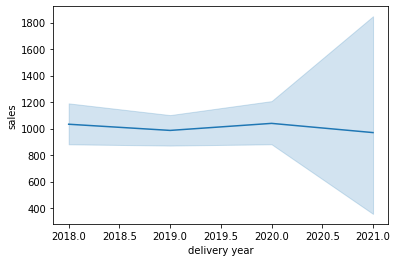

In [ ]:
sns.lineplot(training_set['placement year'], y = training_set['sales'])
plt.show()

sns.lineplot(training_set['delivery year'], y = training_set['sales'])
plt.show()

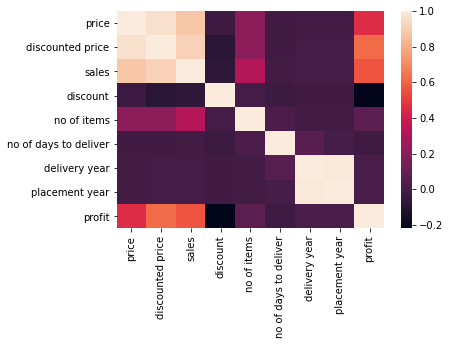

In [ ]:
sns.heatmap(training_set.corr())
plt.show()

In [ ]:
# Standardaise the data
complete_data.head()

,price,discounted price,sales,departure city,discount,no of items,location,class,segment,sub-class,delivery type,departure state,no of days to deliver,delivery year,placement year
0,16.448,13.1584,26.3168,Houston,0.2,2,Central,kariox,Consumer,phone,Standard Class,Texas,0,2018,2018
1,29.700,29.7000,148.5000,Westland,0.0,5,Central,kariox,Consumer,headset,Standard Class,Michigan,0,2018,2018
2,14.730,14.7300,44.1900,Westland,0.0,3,Central,qexty,Consumer,shorts,Standard Class,Michigan,0,2018,2018
3,43.920,43.9200,131.7600,Westland,0.0,3,Central,kariox,Consumer,television,Standard Class,Michigan,0,2018,2018
4,66.580,66.5800,133.1600,Westland,0.0,2,Central,kariox,Consumer,laptop,Standard Class,Michigan,0,2018,2018


In [ ]:
complete_data.shape

(9993, 15)

In [ ]:
# Standard Scaling the data
from sklearn.preprocessing import StandardScaler

# SS object
ss = StandardScaler()

# Fit the numerical features
complete_data[numerical_features] = ss.fit_transform(complete_data[numerical_features])

In [ ]:
# label encode the data
ordinal_data = ['discount', 'no of items', 'no of days to deliver', 'delivery year', 'placement year']
nominal_data = ['departure city', 'location', 'class', 'segment', 'sub-class', 'delivery type', 'departure state']

from sklearn.preprocessing import LabelEncoder

# Label Encoder object
le = LabelEncoder()

# Fit and transform the ordinal data
complete_data[ordinal_data[0]] = le.fit_transform(complete_data[ordinal_data[0]])
complete_data[ordinal_data[1]] = le.fit_transform(complete_data[ordinal_data[1]])
complete_data[ordinal_data[2]] = le.fit_transform(complete_data[ordinal_data[2]])
complete_data[ordinal_data[3]] = le.fit_transform(complete_data[ordinal_data[3]])
complete_data[ordinal_data[4]] = le.fit_transform(complete_data[ordinal_data[4]])

In [ ]:
complete_data.head()

,price,discounted price,sales,departure city,discount,no of items,location,class,segment,sub-class,delivery type,departure state,no of days to deliver,delivery year,placement year
0,-0.342453,-0.342162,-0.284987,Houston,3,1,Central,kariox,Consumer,phone,Standard Class,Texas,0,0,0
1,-0.321190,-0.311475,-0.248858,Westland,0,4,Central,kariox,Consumer,headset,Standard Class,Michigan,0,0,0
2,-0.345210,-0.339247,-0.279702,Westland,0,2,Central,qexty,Consumer,shorts,Standard Class,Michigan,0,0,0
3,-0.298374,-0.285095,-0.253808,Westland,0,2,Central,kariox,Consumer,television,Standard Class,Michigan,0,0,0
4,-0.262016,-0.243057,-0.253394,Westland,0,1,Central,kariox,Consumer,laptop,Standard Class,Michigan,0,0,0


In [ ]:
# Encode the nominal data
def encode_nominal_data(data, nominal_data):

  for features in nominal_data:

    dummy = pd.get_dummies(data[features])
    data = pd.concat((data, dummy), axis = 1)
  
  return data

# call the above method
complete_data = encode_nominal_data(complete_data, nominal_data)
complete_data.drop(nominal_data, axis=1, inplace=True)



In [ ]:
complete_data.shape

(9993, 619)

In [ ]:
complete_data.head()

,price,discounted price,sales,discount,no of items,no of days to deliver,delivery year,placement year,Aberdeen,Abilene,Akron,Albuquerque,Alexandria,Allen,Allentown,Altoona,Amarillo,Anaheim,Andover,Ann Arbor,Antioch,Apopka,Apple Valley,Appleton,Arlington,Arlington Heights,Arvada,Asheville,Athens,Atlanta,Atlantic City,Auburn,Aurora,Austin,Avondale,Bakersfield,Baltimore,Bangor,Bartlett,Bayonne,...,Georgia,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachusetts,Michigan,Minnesota,Mississippi,Missouri,Montana,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,North Dakota,Ohio,Oklahoma,Oregon,Pennsylvania,Rhode Island,South Carolina,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,-0.342453,-0.342162,-0.284987,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,-0.321190,-0.311475,-0.248858,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,-0.345210,-0.339247,-0.279702,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,-0.298374,-0.285095,-0.253808,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,-0.262016,-0.243057,-0.253394,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Split the data again into training and testing set
train_set = complete_data[ : train_len]
test_set = complete_data[train_len : ]

#Feature Selection

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor

In [ ]:
# Model object
dt_reg_0 = DecisionTreeRegressor(max_features=None) # Feature selection using DecisionTrees

# Set params
criterion = ["mse", "friedman_mse", "mae", "poisson"]
splitter = ["best", "random"]
max_depth = list(np.arange(5, 500, 50))
max_depth.append(None)
min_samples_split = list(np.arange(2, 10))
min_samples_leaf = list(np.arange(1, 10))

params = {"criterion" : criterion,
          "splitter" : splitter,
          "max_depth" : max_depth,
          "min_samples_split" : min_samples_split,
          "min_samples_leaf" : min_samples_leaf}

# RandomizedSearchCV
rscv_features = RandomizedSearchCV(dt_reg_0, params, n_iter=50, scoring='r2', cv = 2, verbose=1, random_state=0)

# Fit the model
rscv_features.fit(train_set.values, y.values)

Fitting 2 folds for each of 50 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'poisson'

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'poisson'

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'poisson'

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test parti

KeyboardInterrupt: ignored

In [ ]:
# Check the best estimator
rscv_features.best_estimator_

DecisionTreeRegressor(ccp_alpha=0.0, criterion='friedman_mse', max_depth=355,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=9, min_samples_split=3,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='random')

In [ ]:
# Check score
rscv_features.score(train_set.values, y.values)

0.567114747633586

In [ ]:
# Clone the best estimator
from sklearn.base import clone
dt_0 = clone(rscv_features.best_estimator_)
dt_0.fit(train_set.values, y.values)

# Check the feature importance
feat_imp = dt_0.feature_importances_

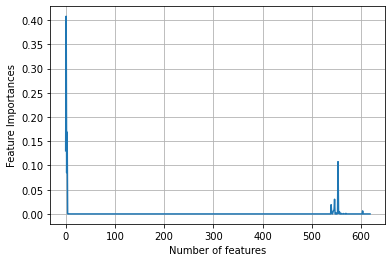

In [ ]:
# Plot the feat_imp
plt.plot(feat_imp)
plt.yticks(np.arange(0,0.41, 0.05))
plt.grid()
plt.xlabel("Number of features")
plt.ylabel("Feature Importances")
plt.show()

In [ ]:
# Select the features having feature importance < 0.05
important_features = []
for feature, value in zip(train_set.columns, feat_imp):

  # if the feat_imp >= 0.05 select the feature
  if value > 0.05:
    important_features.append(feature)

In [ ]:
len(important_features)

5

In [ ]:
important_features

['price', 'discounted price', 'sales', 'discount', 'fastfood']

In [ ]:
# New Dataset
X_train_data = train_set[important_features]
X_test_data = test_set[important_features]

In [ ]:
X_train_data.shape, X_test_data.shape

((6699, 5), (3294, 5))

# Model Building

In [ ]:
# Model object
dt_reg = DecisionTreeRegressor()

# Set params
criterion = ["mse", "friedman_mse", "mae", "poisson"]
splitter = ["best", "random"]
max_depth = list(np.arange(5, 500, 50))
max_depth.append(None)
min_samples_split = list(np.arange(2, 10))
min_samples_leaf = list(np.arange(1, 10))

params = {"criterion" : criterion,
          "splitter" : splitter,
          "max_depth" : max_depth,
          "min_samples_split" : min_samples_split,
          "min_samples_leaf" : min_samples_leaf}

# Select best hyperparameters
rscv_dt = RandomizedSearchCV(dt_reg, params, 100, cv=3, scoring='r2', random_state=None)

# Fit the model
rscv_dt.fit(X_train_data, y)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'poisson'

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'poisson'

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'poisson'

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'poisson'

  Fi

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features=None,
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   presort='deprecated',
                                                   random_state=None,
                                                   splitter='best'),
                   iid='d

In [ ]:
rscv_dt.cv_results_

{'mean_fit_time': array([0.00584475, 0.68107557, 0.0019563 , 0.0018696 , 0.00189098,
        0.00736022, 0.47927189, 0.00588012, 0.00282971, 0.00225862,
        0.02390099, 0.02833509, 0.00585516, 0.02379235, 0.0047226 ,
        0.00240993, 0.00511622, 0.00208712, 0.00452598, 0.00207059,
        0.00237854, 0.29284136, 0.00194136, 0.02323937, 0.35953712,
        0.69629288, 0.00455117, 0.02257268, 0.00460331, 0.02280958,
        0.02523732, 0.02362378, 0.0021708 , 0.00459305, 0.53914086,
        0.00190624, 0.00175881, 0.43201971, 0.62994941, 0.00424178,
        0.01700044, 0.00318821, 0.00150021, 0.01797406, 0.00146731,
        0.01644357, 0.41803829, 0.01147819, 0.31466738, 0.01140706,
        0.00213257, 0.00204635, 0.02592643, 0.02260256, 0.00213353,
        0.02943977, 0.34545064, 0.00553354, 0.00633113, 0.02496131,
        0.69755189, 0.00234159, 0.00308426, 0.00141382, 0.01778905,
        0.00151348, 0.00146468, 0.00332046, 0.00348274, 0.00139467,
        0.01594917, 0.02494415,

In [ ]:
rscv_dt.best_estimator_

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mae', max_depth=255,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=2, min_samples_split=6,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='random')

In [ ]:
# CLone for ensembling
dt = DecisionTreeRegressor(ccp_alpha=0.0, criterion='mae', max_depth=355,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=2, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='random')

# Fit the data once again for checking the selected features
dt.fit(X_train_data, y)
dt.feature_importances_

array([0.20957272, 0.31571061, 0.24928775, 0.19512153, 0.03030739])

In [ ]:
dt.fit(X_train, y_train)
dt.score(X_test, y_test)

0.6341747432276096

In [ ]:
np.sum(dt.feature_importances_)

1.0000000000000002

In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor

# Model Object
rf_reg = RandomForestRegressor()

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

#RSCV
rf_rscv = RandomizedSearchCV(rf_reg, random_grid, scoring='r2', cv = 2, random_state=0, verbose = 1, n_jobs = -1)
# Fit the model
rf_rscv.fit(X_train, y_train)

Fitting 2 folds for each of 10 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  2.7min finished


RandomizedSearchCV(cv=2, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [ ]:
rf_rscv.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=100, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=800, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
# Best model
rf = RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=100, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=800, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=100, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=800, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
rf.score(X_test, y_test)

0.5335146770899624

In [ ]:
rf_rscv.score(X_test, y_test)

0.5713231113825878

In [ ]:
# xgboost
import xgboost

# Model object
xgr = xgboost.XGBRegressor()

# Params
params = {"learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
          "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
          "min_child_weight" : [ 1, 3, 5, 7 ],
          "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
          "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ] }

# Rscv
rscv_xgb = RandomizedSearchCV(xgr, params, cv = 3, n_iter = 20, n_jobs = -1, scoring = 'r2')
# Fit the model
rscv_xgb.fit(train_set.values, y.values)

[22:36:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:linear',
                                          random_state=0, reg_alpha=...
                                          seed=None, silent=None, subsample=1,
                                          verbosity=1),
                   iid='deprecated', n_iter=20, n_job

In [ ]:
rscv_xgb.cv_results_

{'mean_fit_time': array([ 9.22765017, 17.08753975,  6.37894018,  5.69709563,  5.75222961,
         7.40607754,  7.01751876, 19.9450984 , 10.20583701,  6.97767742,
        16.87572606, 19.87187346,  6.95435023,  3.61962716,  5.62266143,
         5.83117429,  6.94161169,  3.81655502,  7.81955878,  8.09880296]),
 'mean_score_time': array([0.0256807 , 0.04048212, 0.02590458, 0.02945248, 0.0261364 ,
        0.027776  , 0.0393695 , 0.04595486, 0.03582223, 0.03004773,
        0.03646374, 0.04299116, 0.0290966 , 0.02428993, 0.03249351,
        0.02819626, 0.03231311, 0.02777235, 0.02926485, 0.02447454]),
 'mean_test_score': array([0.57825398, 0.4900686 , 0.33292562, 0.46829122, 0.47912766,
        0.45164443, 0.35057021, 0.48627128, 0.44201914, 0.41316427,
        0.34497062, 0.51446057, 0.47048899, 0.52915325, 0.38021798,
        0.41932257, 0.45492635, 0.54831932, 0.59895171, 0.40477213]),
 'param_colsample_bytree': masked_array(data=[0.7, 0.7, 0.7, 0.3, 0.3, 0.7, 0.3, 0.7, 0.5, 0.5, 0.7,
  

In [ ]:
prediction1 = rscv_xgb.predict(test_set.values)

In [ ]:
id = test['id']
data = np.stack((id, prediction1), axis=1)
df = pd.DataFrame(data, columns=['id', 'profit'])
df['id'] = df['id'].astype('int')
df.to_csv("/content/submissions5.csv", index = False)

In [ ]:
X_train_data.shape, train_set.shape

((6699, 5), (6699, 619))

In [ ]:
from keras.models import Sequential
from keras.layers import *
from keras.callbacks import EarlyStopping

In [ ]:
model = Sequential()

model.add(Dense(64, activation='relu', input_shape = [619,]))
model.add(Dense(128, activation='relu'))
model.add(Dense(1))

model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_52 (Dense)             (None, 64)                39680     
_________________________________________________________________
dense_53 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_54 (Dense)             (None, 1)                 129       
Total params: 48,129
Trainable params: 48,129
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Metric
from keras import backend as K

def coeff_determination(y_true, y_pred):
    from keras import backend as K
    SS_res =  K.sum(K.square( y_true-y_pred ))
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

In [ ]:
model.compile(optimizer='adam', loss = 'mse', metrics = coeff_determination)
earlystopping = EarlyStopping(patience=20, monitor = 'val_loss')
hist = model.fit(train_set.values, y.values, epochs=200, validation_split=0.2)

Epoch 1/200
168/168 [==============================] - 1s 3ms/step - loss: 33487.2307 - coeff_determination: -0.0545 - val_loss: 112117.3281 - val_coeff_determination: 0.2096
Epoch 2/200
168/168 [==============================] - 0s 2ms/step - loss: 28309.0444 - coeff_determination: 0.2106 - val_loss: 94983.1797 - val_coeff_determination: 0.1714
Epoch 3/200
168/168 [==============================] - 0s 2ms/step - loss: 26839.8538 - coeff_determination: 0.1290 - val_loss: 76840.1953 - val_coeff_determination: 0.2103
Epoch 4/200
168/168 [==============================] - 0s 2ms/step - loss: 22061.9749 - coeff_determination: 0.1775 - val_loss: 68091.0469 - val_coeff_determination: 0.3993
Epoch 5/200
168/168 [==============================] - 0s 2ms/step - loss: 17800.7916 - coeff_determination: 0.2845 - val_loss: 68624.5078 - val_coeff_determination: 0.3910
Epoch 6/200
168/168 [==============================] - 0s 2ms/step - loss: 11547.8251 - coeff_determination: 0.3177 - val_loss: 67352

In [ ]:
predictions2 = model.predict(test_set.values)
id = test['id']
data2 = np.stack((id, predictions2.reshape((-1,))), axis=1)
df2 = pd.DataFrame(data2, columns=['id', 'profit'])
df2['id'] = df2['id'].astype('int')
df2.to_csv("/content/submissions6.csv", index = False)

In [ ]:
predictions2

array([[16.388039 ],
       [35.48507  ],
       [ 0.5428997],
       ...,
       [21.059792 ],
       [ 9.8536   ],
       [ 1.0712963]], dtype=float32)

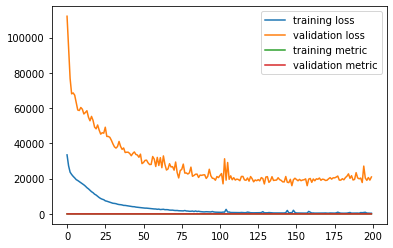

In [ ]:
h = hist.history

plt.plot(h['loss'], label = 'training loss')
plt.plot(h['val_loss'], label = 'validation loss')
plt.plot(h['coeff_determination'], label = 'training metric')
plt.plot(h['val_coeff_determination'], label = 'validation metric')
plt.legend()
plt.show()

In [ ]:
model2 = Sequential()

model2.add(Dense(64, activation='relu', input_shape = [619,]))
model2.add(Dense(64, activation='relu'))
model2.add(Dense(64, activation='relu'))
model2.add(Dense(64, activation='relu'))
model2.add(Dense(64, activation='relu'))
model2.add(Dense(64, activation='relu'))
model2.add(Dense(64, activation='relu'))
model2.add(Dense(64, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(1))

model2.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_95 (Dense)             (None, 64)                39680     
_________________________________________________________________
dense_96 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_97 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_98 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_99 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_100 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_101 (Dense)            (None, 64)              

In [ ]:
model2.compile(optimizer='adam', loss='mse', metrics=coeff_determination)

In [ ]:
hist2 = model2.fit(train_set.values, y, epochs=300, validation_split=0.2)

Epoch 1/300
168/168 [==============================] - 1s 4ms/step - loss: 37462.8717 - coeff_determination: -0.1195 - val_loss: 72677.2891 - val_coeff_determination: 0.3956
Epoch 2/300
168/168 [==============================] - 0s 3ms/step - loss: 27187.6870 - coeff_determination: 0.2409 - val_loss: 58845.6367 - val_coeff_determination: 0.4486
Epoch 3/300
168/168 [==============================] - 1s 3ms/step - loss: 23873.9283 - coeff_determination: 0.2609 - val_loss: 108760.7656 - val_coeff_determination: 0.1250
Epoch 4/300
168/168 [==============================] - 0s 3ms/step - loss: 30913.4057 - coeff_determination: 0.2232 - val_loss: 53594.4062 - val_coeff_determination: 0.4314
Epoch 5/300
168/168 [==============================] - 0s 3ms/step - loss: 9691.3797 - coeff_determination: 0.2979 - val_loss: 47111.9180 - val_coeff_determination: 0.5504
Epoch 6/300
168/168 [==============================] - 0s 3ms/step - loss: 8351.5742 - coeff_determination: 0.4195 - val_loss: 39793.1